<a href="https://colab.research.google.com/github/Balaji3810/progfun-wiki/blob/gh-pages/Tensorflow_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##  Tensor flow sentiment analysis

In [2]:
!nvidia-smi

Tue May 19 20:50:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  !pip uninstall tb-nightly tensorboarX tensorboard
  !pip install tf-nightly
except exception:
 pass
 
import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds
%load_ext tensorboard

In [0]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

In [0]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info/

In [8]:
print(tf.__version__)
 

2.3.0-dev20200519


In [9]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset=dataset['train']

In [0]:
info

In [12]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [0]:
len(list(train_dataset))

In [0]:
BUFFER_SIZE=30000
BATCH_SIZE=128

In [0]:
train_dataset=train_dataset.shuffle(BUFFER_SIZE,reshuffle_each_iteration=False)

In [17]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'45136837'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B004C4XO7Q'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'466949359'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Monoprice MICROSOFT ZUNE AUTO / CAR CHARGER'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b"Bought this back in December. It's now May of the following year and this thing has gone kapooot! I WILL NOT buy this specific product again.">, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2011-05-27'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b"Didn't last that long">, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R3G1M5X3U8WOZC'>, 'star_ratin

In [0]:
for reviews in train_dataset.take(10):
  review_text=reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating') > 3,1,0).numpy())

In [0]:
tokenizer = tfds.features.text.Tokenizer()
vocabulary_set=set()

for _, reviews in train_dataset.enumerate():
  review_text=reviews['data']
  review_tokens=tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(review_tokens)

vocab_size=len(vocabulary_set)
vocabulary_set

In [0]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [21]:
print(vocabulary_set) 

{'x5', 'morn', 'empfehlenswerter', 'diluted', 'ADMS', 'administrative', 'DING', 'blanks', 'reallybug', 'BLUE', 'A2', 'POOF', 'interminable', 'useage', 'enclosures', 'journey', 'campfires', 'Gizmo', '148BT', 'expertly', 'DELAY', 'Mi4604PBLK', '1a66cffb6a753403712db268f47a596e', 'adequite', 'supped', 'KNA', 'PESIMO', 'Dockers', 'CONSEQUENTLY', 'nes', 'REMARKABLY', 'cargan', 'plunger', 'stippled', 'mths', 'Airplay', 'attenuation', 'Xp', 'two', 'crowd', 'Popular', 'Attractively', 'mo3SPH4TQH80FUX', 'Amjimshop', 'docking', 'Padded', 'endurance', 'iOttie', 'coily', 'profanity', 'GearJuice', 'B004M5KV3A', 'effect', 'D1100M', 'D300', 'unbeliever', '80BG', 'expecteing', 'Unthethered', 'beanbag', 'FUNCTIONS', 'Naja', 'Sheriff', 'wat', 'outperform', 'adhered', 'Spoke', 'ICVEO', 'jagged', 'looke', 'garman', 'Hamlet', 'SUBWOOFERS', 'IU50V', 'ur', 'Smartstick', 'FTMFW', 'B00F3JZRK6', 'Sakar', 'Minix', 'Stanton', 'entertainly', 'slacking', 'amplified', 'jukeboxes', 'bargan', 'headlight', 'KICKS', 'Yu

In [0]:
for reviews in train_dataset.take(5):
  review_text=reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example=encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

In [0]:
for index in encoded_example:
  print('{} ---------> {}'.format(index, encoder.decode([index])))
 

In [0]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

In [0]:
def encode_map_fn(tensor):
  
  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating') 

  encoded_text, label = tf.py_function(encode, 
                                       inp=[text, label], 
                                       Tout=(tf.int64, tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [0]:
ar_encoded_data = train_dataset.map(encode_map_fn)
 

In [0]:
for f0,f1 in ar_encoded_data.take(2):
 print(f0)
 print(f1)

In [0]:
TAKE_SIZE=10000

train_data=ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data=train_data.padded_batch(BATCH_SIZE)

test_data=ar_encoded_data.take(TAKE_SIZE)
test_data=test_data.padded_batch(BATCH_SIZE)

In [0]:
vocab_size +=1

In [30]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(1439,), dtype=int64, numpy=array([69423, 42610, 16362, ...,     0,     0,     0])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [0]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64,64]:
 model.add(tf.keras.layers.Dense(units, activation='relu'))
 model.add(tf.keras.layers.Dense(1))

In [33]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [0]:
logdir= os.path.join("tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer=tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/sentiment_analysis.hdf5', verbose=1, save_best_only=True)
 
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])


In [0]:
history=model.fit(train_data, epochs=4,validation_data=test_data, callbacks=[tensorboard_callback, checkpointer])

In [0]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [44]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118591976 May 19 21:22 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 118591976 May 19 21:31 /tmp/final_sentiment_analysis.hdf5


In [46]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss,eval_acc))

79/79 [==============================] - 13s 163ms/step - loss: 0.2838 - accuracy: 0.8833

Eval loss: 0.284, Eval accuracy: 0.883


In [0]:
for f0,f1 in test_data.take(1):
 print(f1)
 print(model.predict(f0))

In [0]:
model.layers

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [0]:
model.get_layer('embedding').output

In [56]:
!nvidia-smi

Tue May 19 21:53:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    39W / 250W |   8801MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
 plt.plot(history.history[metric])
 plt.plot(history.history['val_'+metric],'')
 plt.xlabel("Epochs")
 plt.ylabel(metric)
 plt.legend([metric, 'val_'+metric])
 plt.show()

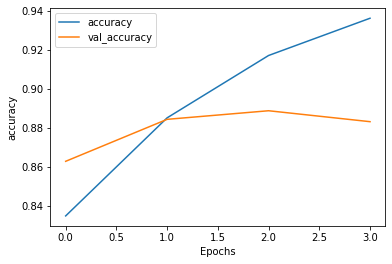

In [61]:
plot_graphs(history,'accuracy')

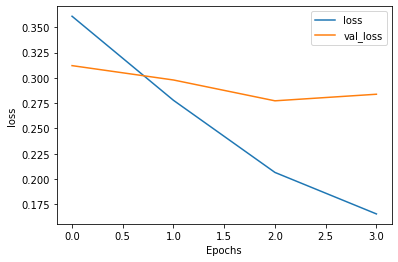

In [62]:
plot_graphs(history,'loss')

In [0]:
tf.keras.backend.clear_session()
sa_load=tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5',compile=False)

In [0]:
def pad_to_size(vec, size):
  zeros=[0] * (size-len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def predict_fn(pred_text):
  encoded_pred_text=encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text=pad_to_size(encoded_pred_text,32)
  print(encoded_pred_text)
  encoded_pred_text=tf.cast(encoded_pred_text,tf.float32)
  predictions=sa_load.predict(tf.expand_dims(encoded_pred_text,0))

  return predictions

In [67]:
pred_text=('This watch is pretty bad. Color and dial looks pathetic')
predictions=predict_fn(pred_text)
print(predictions)

[69881, 48407, 44928, 9933, 11654, 67199, 9350, 4148, 73022, 35457]
[69881, 48407, 44928, 9933, 11654, 67199, 9350, 4148, 73022, 35457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-2.5279207]]


In [68]:
pred_text=('Color and dial does not look as advertised. Shipping was not any better as well')
predictions=predict_fn(pred_text)
print(predictions)

[67199, 9350, 4148, 58393, 61785, 40627, 71342, 64045, 63958, 51649, 61785, 21420, 31959, 71342, 69672]
[67199, 9350, 4148, 58393, 61785, 40627, 71342, 64045, 63958, 51649, 61785, 21420, 31959, 71342, 69672, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-1.0096825]]


In [70]:
pred_text=('Amazing product. Fast delivery. Nice packing')
predictions=predict_fn(pred_text)
print(predictions)

[21955, 15518, 9378, 72780, 57695, 38381]
[21955, 15518, 9378, 72780, 57695, 38381, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[4.9572296]]


In [72]:
pred_text=('Nice product. Packing could have been better')
predictions=predict_fn(pred_text)
print(predictions)

[57695, 15518, 42576, 24411, 49924, 71331, 31959]
[57695, 15518, 42576, 24411, 49924, 71331, 31959, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1.9664277]]


In [0]:
print(tf.distribute.get_replica_context())

In [0]:
%reload_ext tensorboard

In [0]:
tensorboard --logdir /tmp/logs

In [78]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir /tmp/logs (started 0:02:53 ago; pid 2255)
